## PROBLEM DEFINITION

## Bussiness case
#### Create a predictive model to forecast the Covid19 cases based on past cases for a specific country or region.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
confirmed =pd.read_csv('time_series_covid19_confirmed_global.csv')
deaths =pd.read_csv('time_series_covid19_deaths_global.csv')
recovered=pd.read_csv('time_series_covid19_recovered_global.csv')

In [3]:
confirmed.T

,0,1,2,3,4,5,6,7,8,9,...,256,257,258,259,260,261,262,263,264,265
Province/State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Australian Capital Territory,New South Wales,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Australia,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
Lat,33.93911,41.1533,28.0339,42.5063,-11.2027,17.0608,-38.4161,40.0691,-35.4735,-33.8688,...,55.3781,-32.5228,41.377491,6.4238,14.058324,31.9522,24.2155,15.552727,-13.133897,-19.015438
Long,67.709953,20.1683,1.6596,1.5218,17.8739,-61.7964,-63.6167,45.0382,149.0124,151.2093,...,-3.436,-55.7658,64.585262,-66.5897,108.277199,35.2332,-12.8858,48.516388,27.849332,29.154857
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9/17/20,38872,11948,49194,1483,3789,95,601713,46671,113,4196,...,381614,1876,49627,64284,1066,33843,10,2022,13928,7633
9/18/20,38883,12073,49413,1564,3848,95,613658,46910,113,4198,...,385936,1890,50253,65174,1068,34401,10,2024,14022,7647
9/19/20,38919,12226,49623,1564,3901,96,622934,47154,113,4200,...,390358,1904,50992,65949,1068,35003,10,2026,14070,7672
9/20/20,39044,12385,49826,1564,3991,96,631365,47431,113,4204,...,394257,1917,51640,66656,1068,35686,10,2026,14131,7683


In [4]:
deaths.T

,0,1,2,3,4,5,6,7,8,9,...,256,257,258,259,260,261,262,263,264,265
Province/State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Australian Capital Territory,New South Wales,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Australia,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
Lat,33.93911,41.1533,28.0339,42.5063,-11.2027,17.0608,-38.4161,40.0691,-35.4735,-33.8688,...,55.3781,-32.5228,41.377491,6.4238,14.058324,31.9522,24.2155,15.552727,-13.133897,-19.015438
Long,67.709953,20.1683,1.6596,1.5218,17.8739,-61.7964,-63.6167,45.0382,149.0124,151.2093,...,-3.436,-55.7658,64.585262,-66.5897,108.277199,35.2332,-12.8858,48.516388,27.849332,29.154857
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9/17/20,1436,347,1654,53,144,3,12460,925,3,52,...,41705,46,413,520,35,244,1,585,326,224
9/18/20,1437,353,1659,53,147,3,12656,926,3,52,...,41732,46,419,530,35,250,1,585,329,224
9/19/20,1437,358,1665,53,147,3,12799,928,3,53,...,41759,46,427,539,35,253,1,585,330,225
9/20/20,1441,362,1672,53,152,3,13053,930,3,53,...,41777,46,433,547,35,262,1,586,330,225


In [5]:
recovered.T

,0,1,2,3,4,5,6,7,8,9,...,243,244,245,246,247,248,249,250,251,252
Province/State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Australian Capital Territory,New South Wales,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Australia,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
Lat,33.93911,41.1533,28.0339,42.5063,-11.2027,17.0608,-38.4161,40.0691,-35.4735,-33.8688,...,55.3781,-32.5228,41.377491,6.4238,14.058324,31.9522,24.2155,15.552727,-13.133897,-19.015438
Long,67.709953,20.1683,1.6596,1.5218,17.8739,-61.7964,-63.6167,45.0382,149.0124,151.2093,...,-3.436,-55.7658,64.585262,-66.5897,108.277199,35.2332,-12.8858,48.516388,27.849332,29.154857
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9/17/20,32505,6788,34675,1054,1405,91,456347,42231,110,2994,...,0,1582,45970,52564,940,23060,8,1221,13029,5841
9/18/20,32576,6831,34818,1164,1443,92,467286,42369,110,2994,...,0,1603,46527,54218,941,23333,8,1221,13207,5883
9/19/20,32576,6888,34923,1164,1445,92,478077,42551,110,2994,...,0,1612,47271,55155,942,23446,8,1221,13365,5914
9/20/20,32576,6940,35047,1164,1445,92,488231,42608,110,2994,...,0,1621,47932,56096,942,23700,8,1227,13365,5924


In [6]:
recovered.shape

(253, 248)

In [7]:
deaths.shape

(266, 248)

In [8]:
confirmed.shape

(266, 248)

In [9]:
confirmed['Country/Region'].value_counts()

China             33
Canada            14
United Kingdom    11
France            11
Australia          8
                  ..
Greece             1
Grenada            1
Guatemala          1
Guinea             1
Zimbabwe           1
Name: Country/Region, Length: 188, dtype: int64

In [10]:
print(confirmed['Country/Region'].nunique(),confirmed['Country/Region'].unique())

188 ['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Burma' 'Burundi'
 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada' 'Central African Republic'
 'Chad' 'Chile' 'China' 'Colombia' 'Comoros' 'Congo (Brazzaville)'
 'Congo (Kinshasa)' 'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus'
 'Czechia' 'Denmark' 'Diamond Princess' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Fiji' 'Finland' 'France'
 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Grenada'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Holy See'
 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq'
 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan'

In [11]:
#Filter the 3 dataframe for data of India only
india_confirmed=confirmed[confirmed['Country/Region']=="India"].T
india_deaths=deaths[deaths['Country/Region']=="India"].T
india_recovered=recovered[recovered['Country/Region']=="India"].T
print(india_confirmed)
print(india_deaths)
print(india_recovered)

                      143
Province/State        NaN
Country/Region      India
Lat             20.593684
Long             78.96288
1/22/20                 0
...                   ...
9/17/20           5214677
9/18/20           5308014
9/19/20           5400619
9/20/20           5487580
9/21/20           5487580

[248 rows x 1 columns]
                      143
Province/State        NaN
Country/Region      India
Lat             20.593684
Long             78.96288
1/22/20                 0
...                   ...
9/17/20             84372
9/18/20             85619
9/19/20             86752
9/20/20             87882
9/21/20             87882

[248 rows x 1 columns]
                      130
Province/State        NaN
Country/Region      India
Lat             20.593684
Long             78.96288
1/22/20                 0
...                   ...
9/17/20           4112551
9/18/20           4208431
9/19/20           4303043
9/20/20           4396399
9/21/20           4396399

[248 rows x 1 c

In [12]:
india_join=india_confirmed.join(india_deaths,how='left',lsuffix='_confirmed',rsuffix='_deaths')
india=india_join.join(india_recovered,how='left',lsuffix='_',rsuffix='_recovered')
india=india.rename(columns={"143_confirmed":"confirmed","143_deaths":"deaths",130:"recovered"})

In [13]:
india

,confirmed,deaths,recovered
Province/State,NaN,NaN,NaN
Country/Region,India,India,India
Lat,20.593684,20.593684,20.593684
Long,78.96288,78.96288,78.96288
1/22/20,0,0,0
...,...,...,...
9/17/20,5214677,84372,4112551
9/18/20,5308014,85619,4208431
9/19/20,5400619,86752,4303043
9/20/20,5487580,87882,4396399


### Basic Checks

In [14]:
india.head(20)

,confirmed,deaths,recovered
Province/State,NaN,NaN,NaN
Country/Region,India,India,India
Lat,20.593684,20.593684,20.593684
Long,78.96288,78.96288,78.96288
1/22/20,0,0,0
1/23/20,0,0,0
1/24/20,0,0,0
1/25/20,0,0,0
1/26/20,0,0,0
1/27/20,0,0,0


In [15]:
india.tail()

,confirmed,deaths,recovered
9/17/20,5214677,84372,4112551
9/18/20,5308014,85619,4208431
9/19/20,5400619,86752,4303043
9/20/20,5487580,87882,4396399
9/21/20,5487580,87882,4396399


In [16]:
india.info()

<class 'pandas.core.frame.DataFrame'>
Index: 248 entries, Province/State to 9/21/20
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   confirmed  247 non-null    object
 1   deaths     247 non-null    object
 2   recovered  247 non-null    object
dtypes: object(3)
memory usage: 15.9+ KB


In [17]:
india.describe()

,confirmed,deaths,recovered
count,247,247,247
unique,209,189,192
top,3,0,0
freq,28,49,25


In [18]:
#Exclude the less significant rowa of the data
india=india[4:]

In [19]:
india.index=pd.to_datetime(india.index)

In [20]:
india

,confirmed,deaths,recovered
2020-01-22,0,0,0
2020-01-23,0,0,0
2020-01-24,0,0,0
2020-01-25,0,0,0
2020-01-26,0,0,0
...,...,...,...
2020-09-17,5214677,84372,4112551
2020-09-18,5308014,85619,4208431
2020-09-19,5400619,86752,4303043
2020-09-20,5487580,87882,4396399


In [21]:
df=india['confirmed']
df

2020-01-22          0
2020-01-23          0
2020-01-24          0
2020-01-25          0
2020-01-26          0
               ...   
2020-09-17    5214677
2020-09-18    5308014
2020-09-19    5400619
2020-09-20    5487580
2020-09-21    5487580
Name: confirmed, Length: 244, dtype: object

### Exploratory Data Analysis

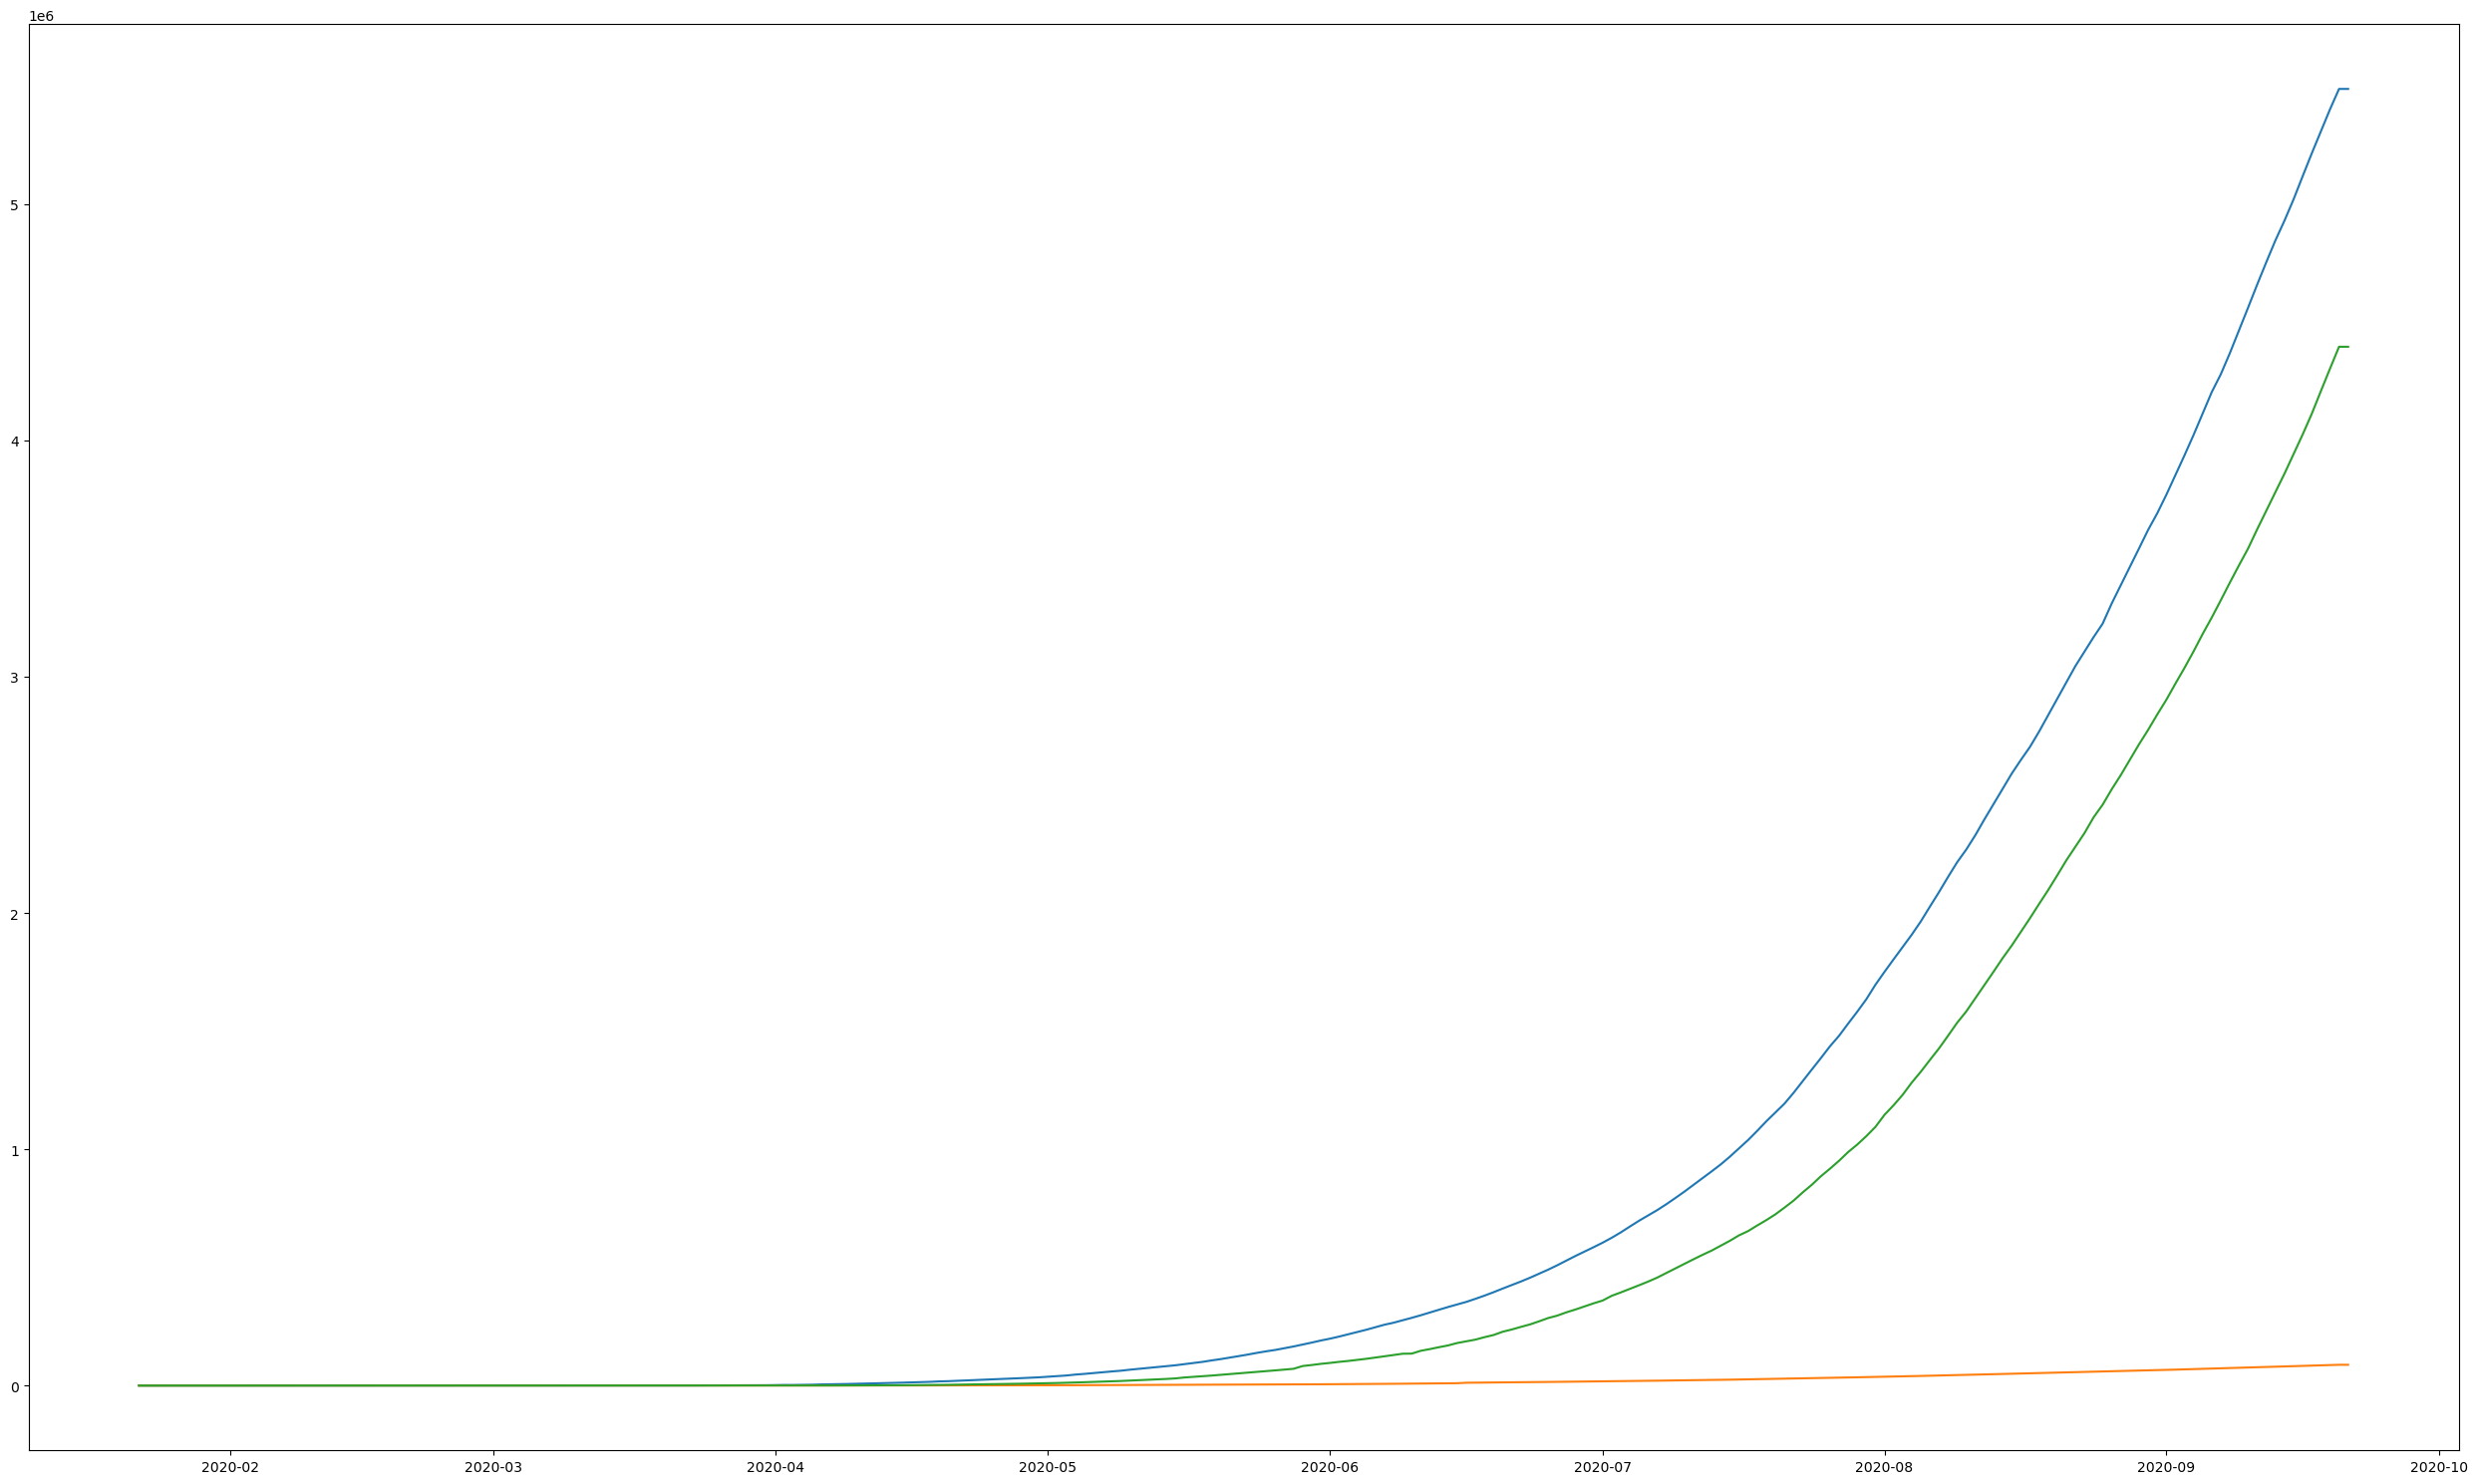

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,15),facecolor='white')#canvas  size
plt.plot(india)#line plot 
plt.tight_layout()

In [23]:
## Plotting the autocorrelation plot
from statsmodels.graphics.tsaplots import plot_acf

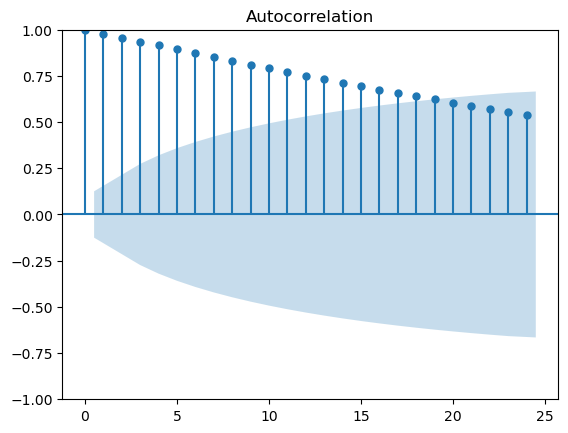

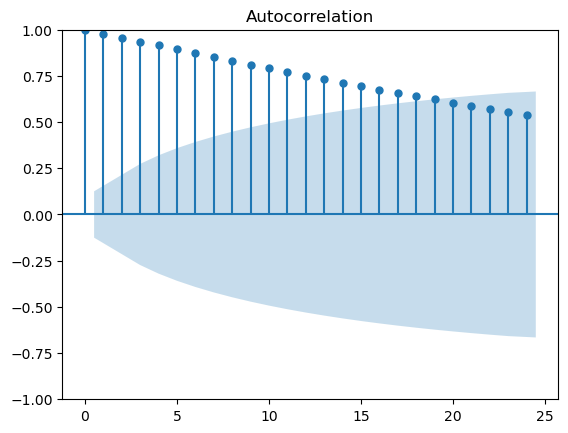

In [24]:
plot_acf(df)

In [25]:
## making it stationary by taking difference of 1
data=df.diff(periods=1)

In [26]:
data

2020-01-22      NaN
2020-01-23        0
2020-01-24        0
2020-01-25        0
2020-01-26        0
              ...  
2020-09-17    96424
2020-09-18    93337
2020-09-19    92605
2020-09-20    86961
2020-09-21        0
Name: confirmed, Length: 244, dtype: object

In [27]:
data1=data.iloc[1:]
data1

2020-01-23        0
2020-01-24        0
2020-01-25        0
2020-01-26        0
2020-01-27        0
              ...  
2020-09-17    96424
2020-09-18    93337
2020-09-19    92605
2020-09-20    86961
2020-09-21        0
Name: confirmed, Length: 243, dtype: object

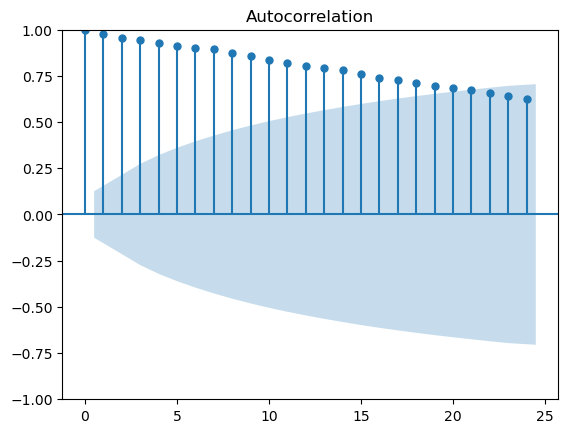

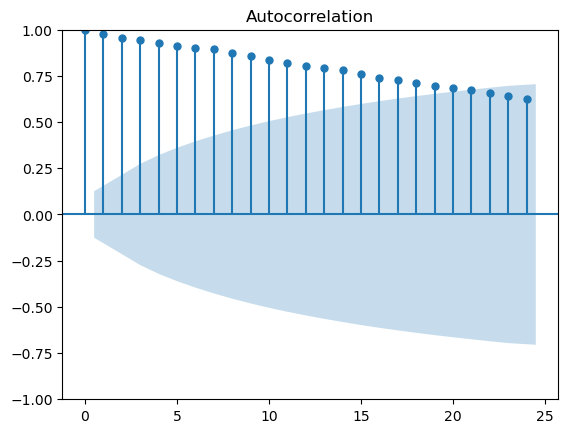

In [28]:
plot_acf(data1)

In [29]:
data2=data1.diff(periods=1)
data2

2020-01-23       NaN
2020-01-24         0
2020-01-25         0
2020-01-26         0
2020-01-27         0
               ...  
2020-09-17     -1470
2020-09-18     -3087
2020-09-19      -732
2020-09-20     -5644
2020-09-21    -86961
Name: confirmed, Length: 243, dtype: object

In [30]:
data3=data2.iloc[1:]

In [31]:
data3

2020-01-24         0
2020-01-25         0
2020-01-26         0
2020-01-27         0
2020-01-28         0
               ...  
2020-09-17     -1470
2020-09-18     -3087
2020-09-19      -732
2020-09-20     -5644
2020-09-21    -86961
Name: confirmed, Length: 242, dtype: object

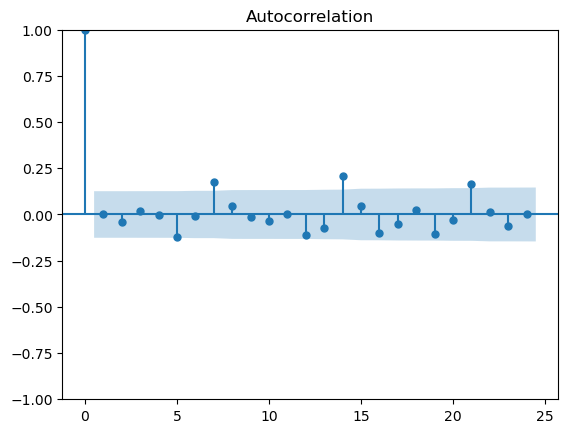

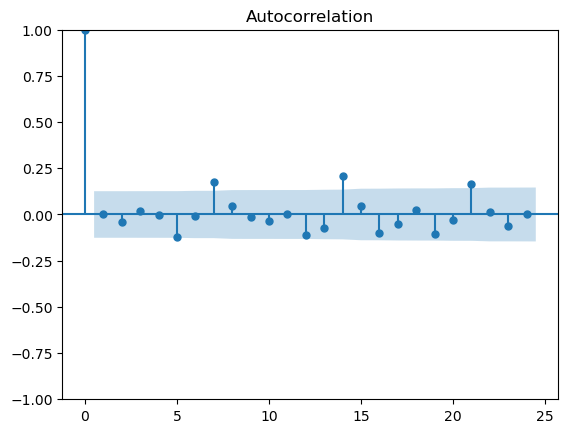

In [32]:
plot_acf(data3)

In [33]:
data4=data3.diff(periods=1)
data4

2020-01-24       NaN
2020-01-25         0
2020-01-26         0
2020-01-27         0
2020-01-28         0
               ...  
2020-09-17     -9241
2020-09-18     -1617
2020-09-19      2355
2020-09-20     -4912
2020-09-21    -81317
Name: confirmed, Length: 242, dtype: object

In [34]:
data5=data4.iloc[1:]
data5

2020-01-25         0
2020-01-26         0
2020-01-27         0
2020-01-28         0
2020-01-29         0
               ...  
2020-09-17     -9241
2020-09-18     -1617
2020-09-19      2355
2020-09-20     -4912
2020-09-21    -81317
Name: confirmed, Length: 241, dtype: object

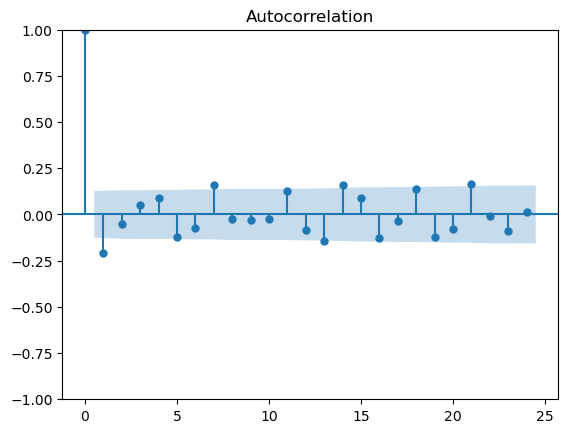

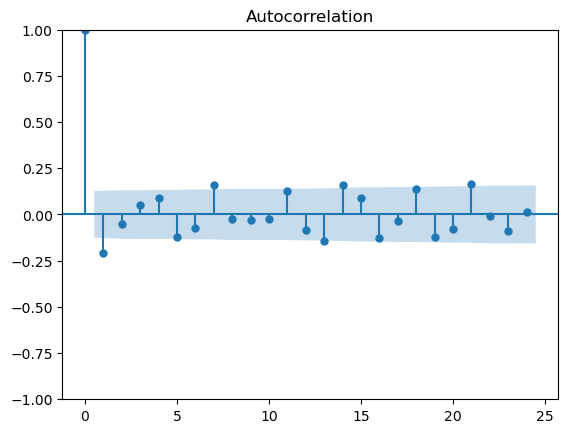

In [35]:
plot_acf(data5)

In [36]:
data5.shape

(241,)

In [37]:
split_point=int(0.7*len(india))
print(split_point)
train=india[0:split_point]
test=india[split_point:]

170


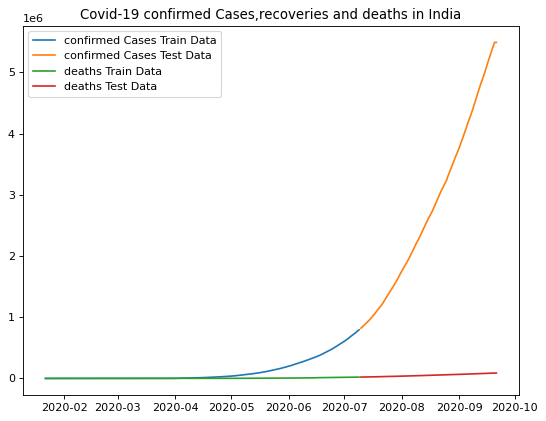

In [39]:
import matplotlib.pyplot as plt

plt.figure(num=None,figsize=(8,6),dpi=80)
plt.plot(train.confirmed,label='confirmed Cases Train Data')
plt.plot(test.confirmed,label='confirmed Cases Test Data')
plt.plot(train.deaths,label='deaths Train Data')
plt.plot(test.deaths,label='deaths Test Data')
plt.legend()
plt.title("Covid-19 confirmed Cases,recoveries and deaths in India")
plt.show()

In [40]:
#Resample the data to weekly interval
resample=train.resample('7D')
weekly=resample.sum()
print(weekly)

            confirmed  deaths  recovered
2020-01-22          0       0          0
2020-01-29         11       0          0
2020-02-05         21       0          0
2020-02-12         21       0          9
2020-02-19         21       0         21
2020-02-26         25       0         21
2020-03-04        261       0         22
2020-03-11        693      13         56
2020-03-18       2355      43        166
2020-03-25       6930     170        565
2020-04-01      23867     673       1785
2020-04-08      59830    2020       6489
2020-04-15     112060    3656      17806
2020-04-22     183925    5835      42226
2020-04-29     283223    9429      77095
2020-05-06     444062   14681     137233
2020-05-13     638985   20307     237188
2020-05-20     920750   27152     382859
2020-05-27    1274960   36255     596123
2020-06-03    1725903   48476     832062
2020-06-10    2243635   66002    1135856
2020-06-17    2874657   93198    1584666
2020-06-24    3701957  112743    2167385
2020-07-01    47

In [41]:
#Resample the data to weekly interval
resample=train.resample('1M')
monthly=resample.sum()
print(monthly)

            confirmed  deaths  recovered
2020-01-31          2       0          0
2020-02-29         84       0         42
2020-03-31      10252     226        818
2020-04-30     447607   14417      85811
2020-05-31    3088494   94154    1216954
2020-06-30   10951713  331856    5916008
2020-07-31    6272257  177197    3836151


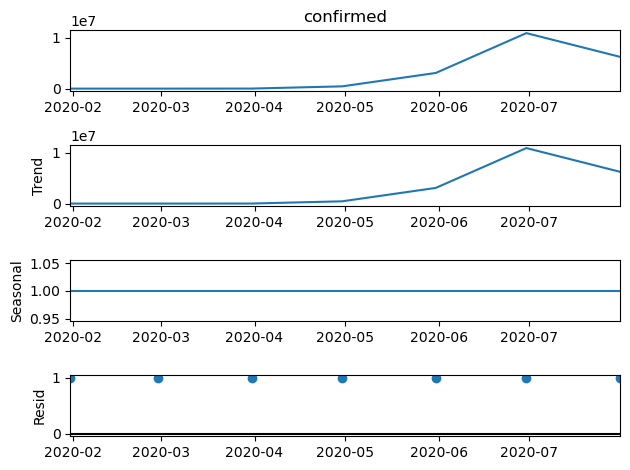

In [42]:
#Decompose the monthly time-series to its components using statements library.
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(monthly.confirmed, period = 1 ,model="multiplicative")
result.plot()
plt.show();

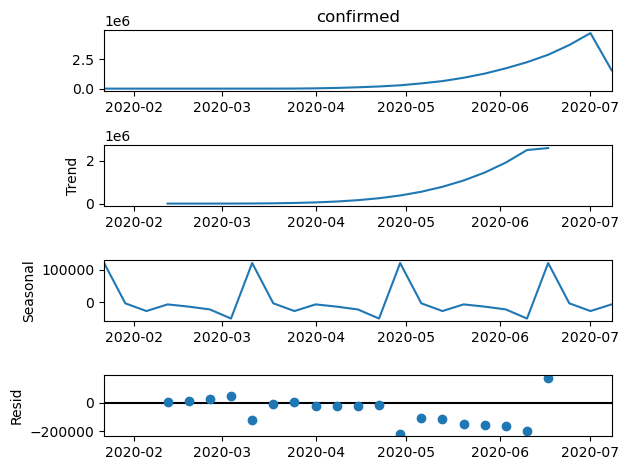

In [43]:
result=seasonal_decompose(weekly.confirmed,period=7,model='additive')
print(result)
result.plot()
plt.show();

In [44]:
#Convert the dataframe columns into int to eliminate any other datatypes
train.confirmed=pd.to_numeric(train.confirmed)
train.deaths=pd.to_numeric(train.deaths)
train.recovered=pd.to_numeric(train.recovered)
test.confirmed=pd.to_numeric(test.confirmed)
train.deaths=pd.to_numeric(test.deaths)
test.recovered=pd.to_numeric(test.recovered)

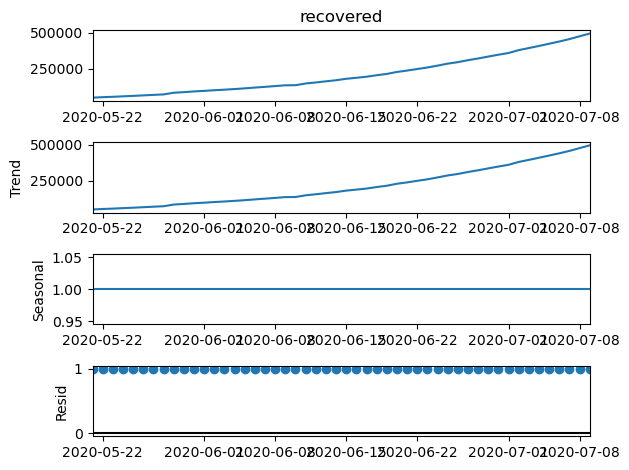

In [45]:
#Decompose the Covid-19 time series
X=train.recovered[120:]
result=seasonal_decompose(X,period=1,model='multiplicative')
result.plot()
plt.show();

In [46]:
from statsmodels.tsa.stattools import adfuller

X=train.confirmed
result=adfuller(X)
print('ADF Statistic:%f '%result[0])
print('p-value:%f '%result[1])
print('Critical Values:')
for key,value in result[4].items():
    print('\t%s:%.3f'%(key,value))

ADF Statistic:0.026931 
p-value:0.960703 
Critical Values:
	1%:-3.473
	5%:-2.880
	10%:-2.577


In [49]:
import warnings
warnings.filterwarnings("ignore")
from statsmodels.tsa.stattools import kpss
statistic,p_value,n_lags,critical_values=kpss(india.confirmed)
print(f'KPSS Statistic:{statistic}')
print(f'p-value:{p_value}')
print(f'num lags:{n_lags}')
print('Critial Values:')
for key,value in critical_values.items():
    print(f' {key}{value}')
print(f'Result:The series is {"not" if p_value < 0.05 else""} stationary')

KPSS Statistic:1.659488067662081
p-value:0.01
num lags:10
Critial Values:
 10%0.347
 5%0.463
 2.5%0.574
 1%0.739
Result:The series is not stationary


### Time-series Modelling and validation

In [50]:
#Prediction is mean of historical data of COVID-19 deaths

pred=train.confirmed.mean()

#For single trdin-test split the prediction will be same for all the test points

prediction=[pred]*len(test)

#Add predictions asacolumn in test

test['Prediction']=prediction

In [51]:
#Calculating the RMSE between actual values and prediction
from sklearn import metrics
from math import sqrt
error=sqrt(metrics.mean_squared_error(test.confirmed,test.Prediction))
print(error)

3024765.6095847026


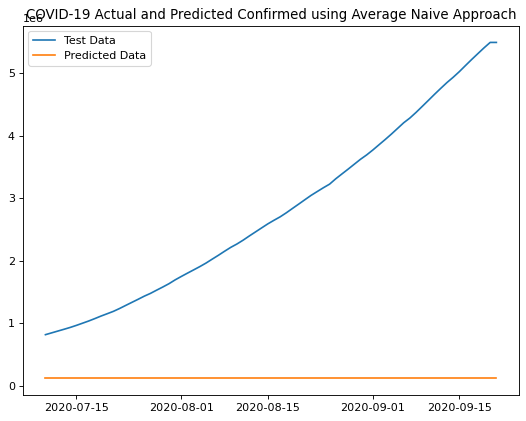

In [52]:
#Visualize the test data and naive average method predictions using matplotlib
import matplotlib.pyplot as plt
                         
plt.figure(num=None,figsize=(8,6),dpi=80)
plt.plot(test.confirmed,label="Test Data")
plt.plot(test.Prediction,label="Predicted Data")
plt.legend()
plt.title('COVID-19 Actual and Predicted Confirmed using Average Naive Approach')
plt.show()

### Walk-Forward Validation

In [53]:
import numpy as np

pred_wf = []
X = train.confirmed.values

# For every element in test , make a prediction , append the test point to training set and Loop ahead
for i in test.confirmed :
    pred = X.mean() 
    pred_wf.append (pred)
    X = np.append (X ,i)

In [54]:
# Add the walk forward prediction as a column in test data
test['pred_wf'] = pred_wf

In [55]:
pred_wf

[122178.87647058823,
 126265.05847953216,
 130470.04069767441,
 134792.49132947976,
 139229.04022988505,
 143783.05142857143,
 148470.9715909091,
 153303.5197740113,
 158279.81460674157,
 163416.69273743016,
 168721.07777777777,
 174172.0,
 179770.38461538462,
 185557.42076502732,
 191549.54347826086,
 197741.2972972973,
 204127.82258064515,
 210713.32085561496,
 217465.2340425532,
 224418.69312169313,
 231563.66315789474,
 238910.16753926701,
 246499.11458333334,
 254293.0207253886,
 262279.6288659794,
 270451.24615384615,
 278807.38265306124,
 287364.3807106599,
 296150.79292929295,
 305158.13065326633,
 314397.39,
 323853.49253731343,
 333481.32178217825,
 343314.60591133,
 353379.9117647059,
 363661.9121951219,
 374158.32038834953,
 384862.6376811594,
 395741.48557692306,
 406779.4736842105,
 418019.82380952383,
 429483.82938388624,
 441164.68396226416,
 453063.91549295775,
 465175.4859813084,
 477460.0093023256,
 489913.0787037037,
 502515.0783410138,
 515394.5229357798,
 528509.1

In [57]:
# Calculate RMSE for walk forward validation using average naive method
error = sqrt ( metrics.mean_squared_error ( test.confirmed ,test.pred_wf)) 
print ( error )

2647251.917004717


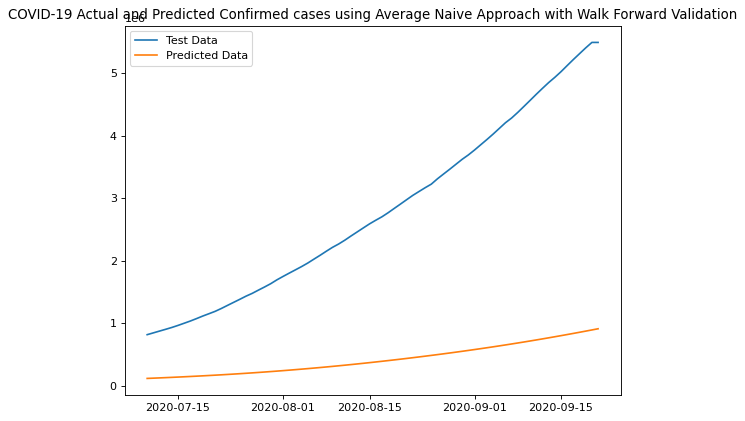

In [58]:
# Plot the actual and predicted values

plt.figure(num=None, figsize=(8, 6), dpi=80)

plt.plot(test.confirmed, label="Test Data")

plt.plot(test.pred_wf, label= "Predicted Data")

plt. legend()

plt.title('COVID-19 Actual and Predicted Confirmed cases using Average Naive Approach with Walk Forward Validation' )
plt.show()

In [59]:
1 # Prediction is the Last observed value of historical data of COVID-19 Confirmed cases
pred = train.confirmed[-1]

# For single train-test split the prediction will be same for all the test points
prediction = [pred]*len(test)

# Add predictions as a column in test

test[ 'Prediction_NM'] = prediction 

In [61]:
 # Calculate the error between actual value and predicted value
error = sqrt(metrics.mean_squared_error(test .confirmed, test .Prediction_NM))
print (error)

2450534.4932774827


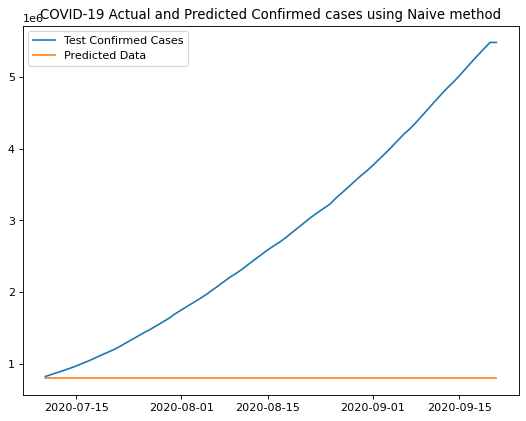

In [62]:
# Visualize the test data and naive method predictions using matpLotlib
import matplotlib.pyplot as plt

plt.figure(num=None, figsize=(8, 6), dpi=80)

plt.plot(test.confirmed, label="Test Confirmed Cases")
plt.plot(test.Prediction_NM, label="Predicted Data")

plt. legend()

plt.title('COVID-19 Actual and Predicted Confirmed cases using Naive method' )
plt.show()

In [63]:
pred_nm_wf = []
X = train.confirmed.values

# For every element in test, make a prediction, append the test point to training set and Loop ahead
for i in test.confirmed:

    pred = X[-1]

    pred_nm_wf.append(pred)

    X = np.append(X, i)

In [64]:
# Add the walk forward prediction as a column in test data
test['pred_nm_wf'] = pred_nm_wf

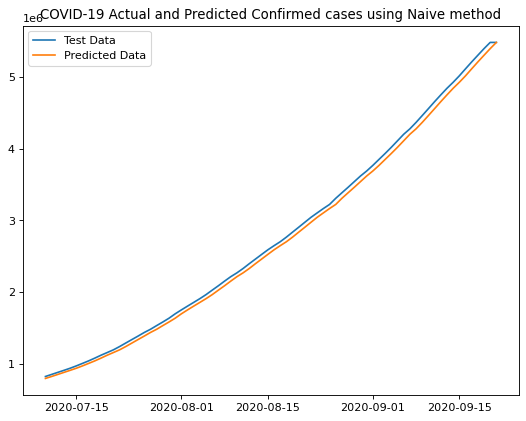

In [65]:
# Visualize the test data and naive method predictions using matplotlib
import matplotlib.pyplot as plt

plt.figure(num=None, figsize=(8, 6), dpi=80)

plt.plot (test.confirmed, label="Test Data")

plt.plot(test.pred_nm_wf, label="Predicted Data")

plt. legend(),

plt.title('COVID-19 Actual and Predicted Confirmed cases using Naive method')
plt.show()

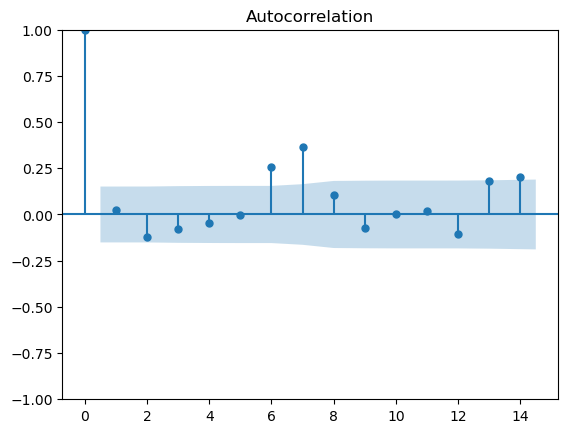

In [66]:
# Plot Autocorrelation Plot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf ( train.confirmed.diff ( ) . diff ( ) . dropna ( ) , lags = 14 )
plt.show ( )

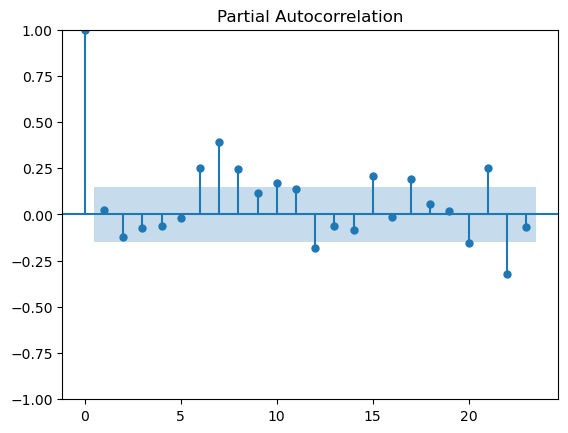

In [67]:
#Plot Partial Autocorrelation Plot
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf ( train.confirmed.diff( ).diff( ).dropna( ) )
plt.show ( )


In [68]:
# Fit the SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX ( train.confirmed ,order = ( 1,2,1 ) , seasonal_order = ( 1,2,1,7 ) )
model_fit = model.fit ( )
#summary of fit model
print ( model_fit.summary ( ) )  

                                     SARIMAX Results                                     
Dep. Variable:                         confirmed   No. Observations:                  170
Model:             SARIMAX(1, 2, 1)x(1, 2, 1, 7)   Log Likelihood               -1193.564
Date:                           Wed, 22 Feb 2023   AIC                           2397.128
Time:                                   12:36:51   BIC                           2412.312
Sample:                               01-22-2020   HQIC                          2403.296
                                    - 07-09-2020                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0332      0.137     -0.243      0.808      -0.301       0.234
ma.L1         -0.5205      0.116     -4.476

In [69]:
# Perform out - of - sample predictions for the entire test data
forecast= model_fit.predict ( start = train.confirmed.shape[0],end = train.confirmed.shape[0]+len(test)-1)

In [70]:
# Calculate the error between actual and predicted values
error = sqrt ( metrics.mean_squared_error ( test.confirmed , forecast ) )
print ( error )

353876.26838131616


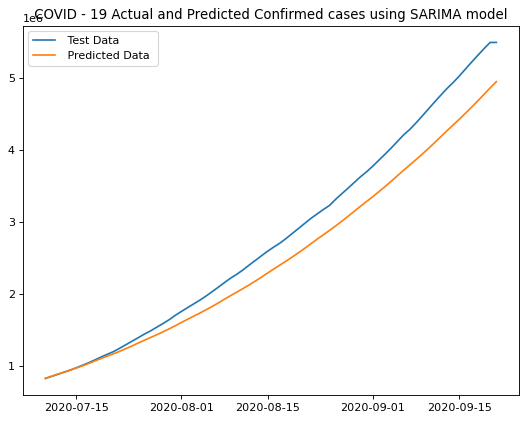

In [71]:
# Plot the actual and predicted values for COVID - 19 related Confirmed cases
plt.figure ( num=None ,figsize = ( 8 , 6 ) , dpi = 80 )
plt.plot ( test.confirmed ,label = " Test Data " )
plt.plot ( forecast , label = " Predicted Data " )
plt.legend ( )
plt.title ( ' COVID - 19 Actual and Predicted Confirmed cases using SARIMA model ' )
plt.show ( )

In [72]:
# Perform out - of - sample predictions using walk forward validation
pred_ARIMA = [ ]
X = train.confirmed.values
                                               
# For every element in test , make a prediction , append the test point to training set and Loop ahead
for i in test.confirmed :
    model_fit = SARIMAX ( X , order = ( 1,1,1 ) ) . fit ( )
    pred=model_fit.forecast ( )
    pred_ARIMA.append ( pred )
    X = np.append ( X , i )

In [73]:
# Add a column in test with prediction by SARIMA model
test['pred_ARIMA'] = pred_ARIMA
test

,confirmed,deaths,recovered,Prediction,pred_wf,Prediction_NM,pred_nm_wf,pred_ARIMA
2020-07-10,820916,22123,515386,122178.876471,122178.876471,793802,793802,[820443.7108188956]
2020-07-11,849522,22673,534618,122178.876471,126265.058480,793802,820916,[848077.4085402874]
2020-07-12,878254,23174,553471,122178.876471,130470.040698,793802,849522,[878287.7347235536]
2020-07-13,906752,23727,571460,122178.876471,134792.491329,793802,878254,[906982.2763584374]
2020-07-14,936181,24309,592032,122178.876471,139229.040230,793802,906752,[935224.3507072069]
...,...,...,...,...,...,...,...,...
2020-09-17,5214677,84372,4112551,122178.876471,840888.464435,793802,5118253,[5213279.118706886]
2020-09-18,5308014,85619,4208431,122178.876471,859112.583333,793802,5214677,[5310672.164634029]
2020-09-19,5400619,86752,4303043,122178.876471,877572.755187,793802,5308014,[5402203.9530385565]
2020-09-20,5487580,87882,4396399,122178.876471,896263.028926,793802,5400619,[5493733.45314692]


In [74]:
# Calculate the error between actual and predicted values
error = sqrt ( metrics.mean_squared_error ( test.confirmed , test.pred_ARIMA ) )
print ( error )

11892.109700782648


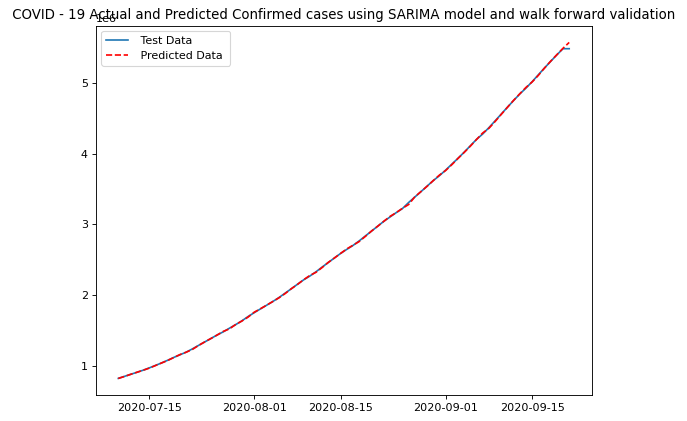

In [75]:
# Plot actual and predicted data
plt.figure ( num = None , figsize = ( 8 , 6 ) , dpi = 80 )
plt.plot ( test.confirmed , label = " Test Data " )
plt.plot ( test.pred_ARIMA , 'r--' , label = " Predicted Data " )
plt.legend ( )
plt.title ( ' COVID - 19 Actual and Predicted Confirmed cases using SARIMA model and walk forward validation ' )
plt.show ( )

In [76]:
! pip install pmdarima

Defaulting to user installation because normal site-packages is not writeable


In [79]:
from pmdarima.arima import auto_arima

arima_model = auto_arima ( train.confirmed , start_p = 1 , d = 1 , start_q = 1 , max_p = 5 , max_d = 2 , max_q = 5 , start_P = 1 , D = None , start_Q = 1,)

In [80]:
arima_model.summary ( )

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  170
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1327.272
Date:                Wed, 22 Feb 2023   AIC                           2662.544
Time:                        12:48:46   BIC                           2675.064
Sample:                    01-22-2020   HQIC                          2667.625
                         - 07-09-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    153.1957     91.729      1.670      0.095     -26.589     332.981
ar.L1          1.0000      0.006    155.125      0.000       0.987       1.013
ma.L1          0.0426      0.051      0.833      0.405      -0.058       0.143
sigma2      3.838e+05   2.62e+04     14.635      0.000    3.32e+05    4.35e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                74.11
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):              38.13   Skew:                             0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [81]:
test ['AutoArima'] = forecast

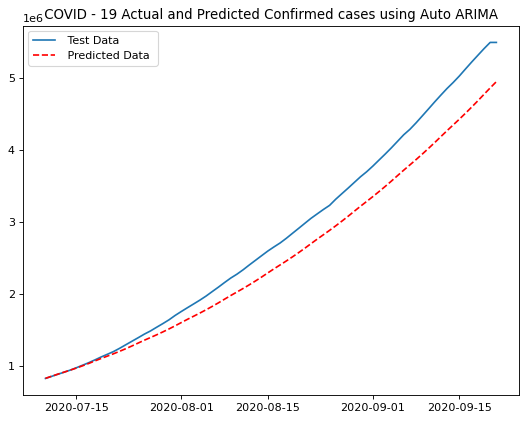

In [82]:
# Plot actual and predicted data
plt.figure ( num =None , figsize = ( 8 , 6 ) , dpi = 80 )
plt.plot ( test.confirmed , label = " Test Data " )
plt.plot ( test.AutoArima , 'r--' , label = " Predicted Data " )
plt.legend ( )
plt.title ( ' COVID - 19 Actual and Predicted Confirmed cases using Auto ARIMA ' )
plt.show ( )

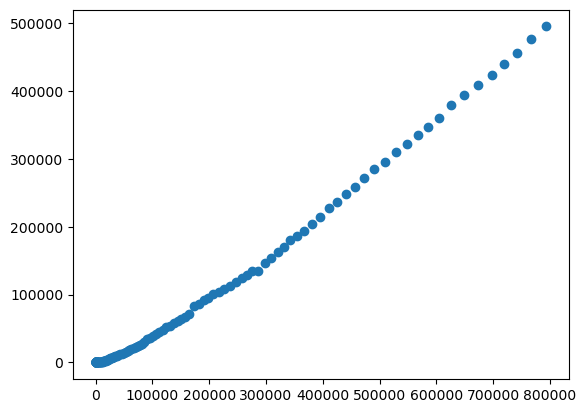

In [83]:
# Scatter plot the data to get an intiution of the correlation to be used
import matplotlib.pyplot as plt
 
    
plt.scatter ( train.confirmed ,train.recovered )

plt.show ( )

In [84]:
from scipy.stats import pearsonr

In [85]:
corr , p = pearsonr ( train . recovered , train.confirmed )
print ( corr , p )

0.9955822343844386 1.5610343732858996e-174


In [86]:
from scipy.stats import spearmanr

corr , p = spearmanr ( train . recovered , train.confirmed )
print ( corr , p )

0.9936995884356098 1.2875296628064113e-161


In [93]:
# Fit the SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX ( train.confirmed , order = ( 1,1,1 ) , seasonal_order = ( 0,0,0,0 ) , exog = train . recovered )
model_fit = model.fit ( )
# summary of fit model
        
print ( model_fit.summary ( ) )

                               SARIMAX Results                                
Dep. Variable:              confirmed   No. Observations:                  170
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1329.492
Date:                Wed, 22 Feb 2023   AIC                           2666.984
Time:                        12:57:09   BIC                           2679.504
Sample:                    01-22-2020   HQIC                          2672.065
                         - 07-09-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
recovered      0.0532      0.018      2.886      0.004       0.017       0.089
ar.L1          1.0000      0.004    239.706      0.000       0.992       1.008
ma.L1          0.1140      0.048      2.390      0.0

In [88]:
# Use the previous value of recovered cases to model the confirmed cases of next day
test ['recovered1'] = test.recovered.shift(1)
test.recovered1[0]= train.recovered [-1]
test.recovered1      

2020-07-10     495513.0
2020-07-11     515386.0
2020-07-12     534618.0
2020-07-13     553471.0
2020-07-14     571460.0
                ...    
2020-09-17    4025079.0
2020-09-18    4112551.0
2020-09-19    4208431.0
2020-09-20    4303043.0
2020-09-21    4396399.0
Name: recovered1, Length: 74, dtype: float64

In [90]:
# Perform out - of - sample predictions for the entire test data
import numpy as np
forecast=model_fit.predict ( start = ( train.confirmed.shape [ 0 ] ) , end= ( train.deaths.shape [ 0 ] + len ( test ) -1 ) , exog = test.recovered1)
forecast

2020-07-10    8.194523e+05
2020-07-11    8.461608e+05
2020-07-12    8.728351e+05
2020-07-13    8.994893e+05
2020-07-14    9.260975e+05
                  ...     
2020-09-17    2.777253e+06
2020-09-18    2.807561e+06
2020-09-19    2.838316e+06
2020-09-20    2.869004e+06
2020-09-21    2.899625e+06
Freq: D, Name: predicted_mean, Length: 74, dtype: float64

In [91]:
# Calculate the error between actual and predicted values
error = sqrt ( metrics.mean_squared_error ( test.confirmed , forecast ) )
print ( error )

1255183.0529047172


In [96]:
test ['SARIMAX'] = forecast

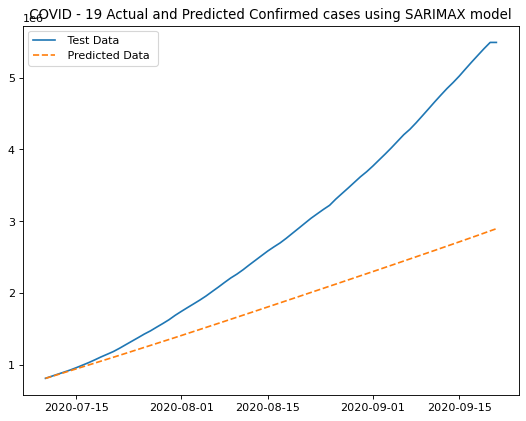

In [97]:
# Plot actual and predicted data
plt.figure ( num = None , figsize = ( 8 , 6 ) , dpi = 80 )
plt.plot ( test.confirmed , label = " Test Data " )
plt.plot ( test.SARIMAX, '--' , label = " Predicted Data " )
plt.legend ( )
plt.title ( ' COVID - 19 Actual and Predicted Confirmed cases using SARIMAX model ' )
plt.show ( )

In [98]:
 # Perform out - of - sample predictions using walk forward validation
pred_ARIMA = [ ]
X = train.confirmed.values
y = train.recovered.values
 # For every element in test , make a prediction , append the test point to training set and Loop ahead
for index , i in test.iterrows( ) :
    model_fit = model = SARIMAX ( X , order = ( 1,1,1 ) , seasonal_order = ( 0,0,0,0 ) , exog = y).fit()
    pred=model_fit.forecast ( exog = np.asarray( y [ -1 ] ).reshape(1,1))
    pred_ARIMA.append(pred)

    X = np.append ( X , i.confirmed )
    y = np.append ( y , i.recovered )

21666.490074598747


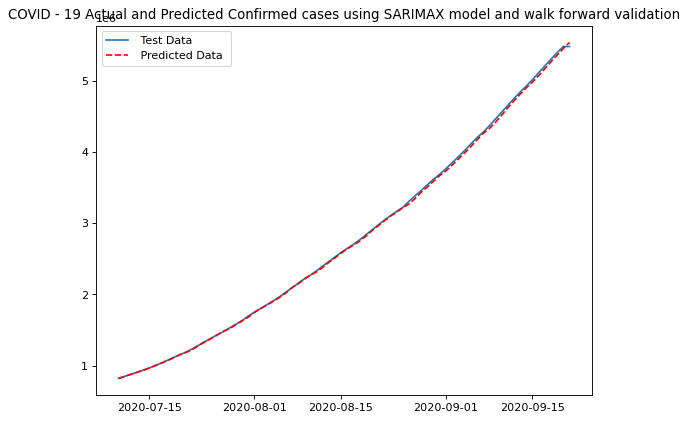

In [99]:
# Add a column in test with prediction by SARIMAX model
test['pred_SARIMAX'] = pred_ARIMA
error = sqrt(metrics.mean_squared_error ( test.confirmed , test.pred_SARIMAX ) )
print ( error )
# Plot actual and predicted data
plt.figure ( num = None , figsize = ( 8 , 6 ) , dpi = 80 )
plt.plot ( test.confirmed , label = " Test Data " )
plt.plot ( test.pred_SARIMAX , 'r--' , label = " Predicted Data " )
plt.legend ( )
plt.title ('COVID - 19 Actual and Predicted Confirmed cases using SARIMAX model and walk forward validation')
plt.show ( )

In [100]:
#Using statsmodel package for exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing ( train.confirmed.values , trend ="additive", damped = True )
model_fit = model.fit()

In [101]:
# Predict for future values using exponential smoothing parameters
predictions_ = model_fit.predict(len(train),len(train)+len(test)-1)

1598304.6630205568


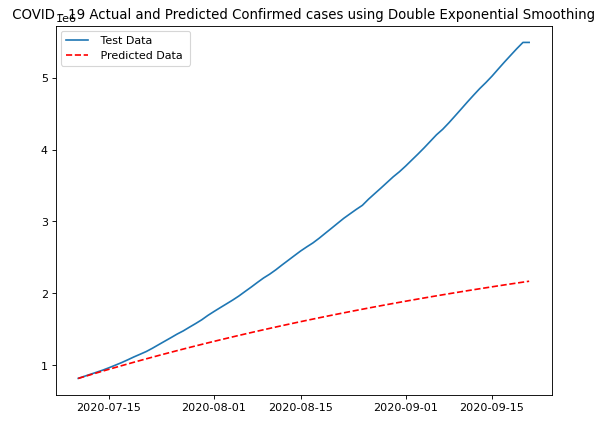

In [102]:
# Add a column in test with prediction by DES model
test ['pred_ES'] = predictions_
error = sqrt ( metrics.mean_squared_error ( test.confirmed , test.pred_ES ) )
print ( error )
# Plot actual and predicted data
plt.figure ( num = None , figsize = ( 8 , 6 ) , dpi = 80 )
plt.plot ( test.confirmed , label = " Test Data " )
plt.plot ( test.pred_ES , 'r--' , label = " Predicted Data " )
plt.legend ( )
plt.title ( ' COVID - 19 Actual and Predicted Confirmed cases using Double Exponential Smoothing ' )
plt.show ( )

In [103]:
# Perform out - of - sample predictions using walk forward validation
pred_WF = [ ]
X = train.confirmed.values
# For every element in test , make a prediction , append the test point to training set and Loop ahead
for index , i in test.iterrows ( ) :
    model_fit = ExponentialSmoothing ( X , trend = "additive" , damped = True ) .fit ( )
    pred=model_fit.predict ( )
    print(pred[0])
    pred_WF.append(pred[0])
    X = np.append( X , i.confirmed )

820026.3085604989
847755.0683393785
877820.0604224409
906700.9713520189
934966.4089370131
965297.8952460976
1001159.3096527712
1038435.1106314443
1073987.0574256391
1116037.8061580951
1158213.2775902962
1192152.1830324924
1230412.5956170824
1283940.647807442
1336904.417345993
1385469.689571479
1433758.0229001855
1485070.3704127672
1524168.9641208765
1583007.0195938249
1631800.850194389
1686954.1439567208
1756497.77762443
1805041.268848272
1856128.720936444
1907273.543914061
1960500.454958211
2020195.8528915052
2088905.6629832666
2149571.060013729
2217087.004848571
2276558.754307883
2321849.1527544535
2389661.643727738
2462903.4054236836
2525156.6198864155
2589986.8134226184
2653346.006489927
2704881.2538158474
2757153.4184434493
2831018.154943062
2905862.407131772
2974065.7953234687
3044853.730756333
3113493.4209865816
3167448.9603292174
3227651.773997251
3281245.312386469
3393943.77935989
3464619.090333835
3539764.026574117
3620243.313489923
3698831.422118304
3761752.9745677756
384552

11737.772475377455


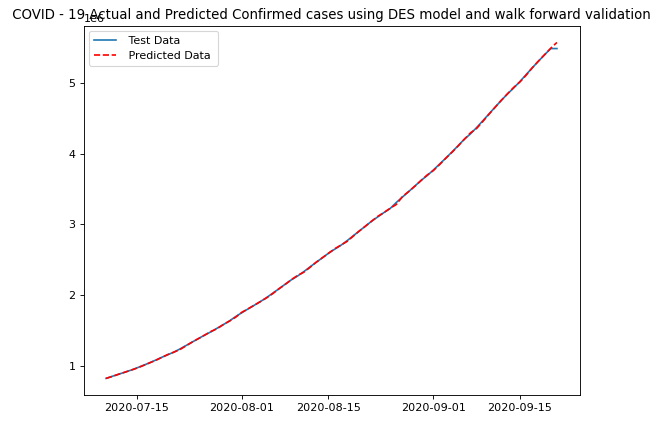

In [104]:
# Add a column in test with prediction by SARIMA model
test ['pred_WF'] = pred_WF
error = sqrt ( metrics.mean_squared_error ( test.confirmed , test.pred_WF ) )
print ( error )
# Plot actual and predicted data
plt.figure ( num = None , figsize = ( 8 , 6 ) , dpi = 80 )
plt.plot ( test.confirmed , label = " Test Data " )
plt.plot ( test.pred_WF , 'r--' , label = " Predicted Data " )
plt.legend ( )
plt.title ( ' COVID - 19 Actual and Predicted Confirmed cases using DES model and walk forward validation ' )
plt.show ( )

### Conclusion